# Run this notebook after running "Crime_EDA_K" and "HousingData_EDA_K"

In [3]:
#initial imports
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy import stats

In [4]:
#import cleaned df 
housing_df = pd.read_csv('Resources/HousingData_clean.csv', index_col = [0])
crime_df = pd.read_csv('Resources/2018To2021CrimeData_clean.csv', index_col = [0])

In [5]:
#preview housing df 
housing_df.head()

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,hasAssociation,homeType,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt
0,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,True,Single Family,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",6011.0,2601.0
1,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,True,Single Family,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,6185.0,1768.0
2,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,True,Single Family,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,7840.0,1478.0
3,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,True,Single Family,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,6098.0,1678.0
4,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,True,Single Family,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,6708.0,2132.0


In [6]:
#create an hour column for the ocurred time
crime_df['hour'] = pd.DatetimeIndex(crime_df['Occurred_Date_Time']).hour

In [7]:
#preview crime df 
crime_df.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Report_Date_Time,Report_Date,Location_Type,Address,...,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year,hour,hour_category
5,20191561862,POSSESSION OF MARIJUANA,1803,N,2019-06-05 22:35:00,06/05/2019,06/05/2019 10:35:00 PM,06/05/2019,RESIDENCE / HOME,6201 SNEED CV,...,0,None,3108421.0,3108421.0,30.193941,-97.763449,"(30.19394123, -97.76344868)",2019,22,Night
6,20191511203,EVADING / FOOT,2723,N,2019-05-31 14:58:00,05/31/2019,05/31/2019 02:58:00 PM,05/31/2019,RESIDENCE / HOME,4618 MANCHACA RD,...,0,None,3099373.0,3099373.0,30.225732,-97.791259,"(30.22573152, -97.79125883)",2019,14,Afternoon
7,2019990714,BURGLARY OF RESIDENCE,500,N,2019-04-09 12:06:00,04/09/2019,04/09/2019 12:06:00 PM,04/09/2019,RESIDENCE / HOME,2101 TERI RD,...,220,Burglary,3111980.0,3111980.0,30.201607,-97.751976,"(30.2016066, -97.75197579)",2019,12,Morning
9,20191561277,POSS CONTROLLED SUB/NARCOTIC,1800,N,2019-06-05 17:53:00,06/05/2019,06/05/2019 05:53:00 PM,06/05/2019,STREETS / HWY / ROAD / ALLEY,12305 E US 290 HWY EB,...,0,None,3179352.0,3179352.0,30.349163,-97.534373,"(30.3491627, -97.5343733)",2019,17,Afternoon
13,20191460782,FAMILY DISTURBANCE,3400,N,2019-05-26 10:07:00,05/26/2019,05/26/2019 10:07:00 AM,05/26/2019,RESIDENCE / HOME,7500 S IH 35 SVRD SB,...,0,None,3104107.0,3104107.0,30.181674,-97.777432,"(30.18167427, -97.77743163)",2019,10,Morning


# Merge crime and housing data sets by zipcode

In [8]:
#change crime_df zipcode column to match housing_df
crime_df.rename(columns = {'Zip_Code':'zipcode'}, inplace = True)

In [9]:
#change zipcode in crime_df from float to int 
crime_df['zipcode'] = crime_df['zipcode'].astype(int)

In [10]:
#group crime_df on zipcodes
group_df = crime_df.groupby(by = crime_df['zipcode'])

In [11]:
#get the count of occurances by zipcode
group_df2 = group_df.count()

In [12]:
#preview grouped df 
group_df2.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year,hour
zipcode,,,,,,,,,,,,,,,,,,,,,
78610,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
78612,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
78613,1963,1963,1963,1963,1963,1963,1963,1963,1963,1963,...,1963,1963,1963,1963,1963,1940,1940,1940,1963,1963
78616,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78617,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497,...,3497,3497,3497,3497,3497,3417,3417,3417,3497,3497


# Practice merging on pandas -- final merge will be on SQL

In [11]:
#merge the dataframes on grouping 
new_merge = pd.merge(housing_df[['latestPrice','propertyTaxRate','zipcode']], group_df2[['Incident_Number','hour']], on ='zipcode',how = 'left')


In [12]:
#change name of Incident_Number column to Count 
new_merge = new_merge.rename(columns={"Incident_Number": "Count_Crimes"})

In [13]:
#preview merge 
new_merge.sample(5)

,latestPrice,propertyTaxRate,zipcode,Count_Crimes,hour
8989,275000.0,1.98,78728,261.0,261.0
789,850000.0,1.98,78732,71.0,71.0
13186,309900.0,1.98,78749,7040.0,7040.0
1263,199000.0,1.98,78617,3497.0,3497.0
12515,339000.0,1.98,78736,1055.0,1055.0


In [14]:
#check datatypes of merged df 
new_merge.dtypes

latestPrice        float64
propertyTaxRate    float64
zipcode              int64
Count_Crimes       float64
hour               float64
dtype: object

In [15]:
#check if theres null values from merge-- nulls will be 0 crimes
new_merge.isnull().sum(axis = 0)

latestPrice         0
propertyTaxRate     0
zipcode             0
Count_Crimes       12
hour               12
dtype: int64

In [16]:
#fill null values with zero 
new_merge[["Count_Crimes","hour"]] = new_merge[["Count_Crimes","hour"]].fillna(0)

In [17]:
#check if theres null values from merge-- nulls will be 0 crimes
new_merge.isnull().sum(axis = 0)

latestPrice        0
propertyTaxRate    0
zipcode            0
Count_Crimes       0
hour               0
dtype: int64

# Machine Learning Model with merged data

In [18]:
new_merge.corr()

,latestPrice,propertyTaxRate,zipcode,Count_Crimes,hour
latestPrice,1.000000,-0.062179,-0.145946,-0.144450,-0.144450
propertyTaxRate,-0.062179,1.000000,-0.172846,-0.185072,-0.185072
zipcode,-0.145946,-0.172846,1.000000,0.110361,0.110361
Count_Crimes,-0.144450,-0.185072,0.110361,1.000000,1.000000
hour,-0.144450,-0.185072,0.110361,1.000000,1.000000


In [19]:
X = new_merge[["Count_Crimes","hour","propertyTaxRate"]]
y = new_merge[["latestPrice"]]

In [20]:
model = linear_model.LinearRegression()

In [21]:
model.fit(X,y)

LinearRegression()

In [22]:
y_pred = model.predict(X)
y_pred.shape

(15171, 1)

In [23]:
print(model.coef_)
print(model.intercept_)

[[-3.77298222e+00 -3.77298302e+00 -7.85716829e+05]]
[2163779.95823627]


In [24]:
r2_score(y, y_pred)

0.02905161838810788

# Attempting SVM 

In [25]:
#encoding home association to numbers 1= True, 0 = False
to_num = {True:1,False:0}
housing_df["Association"] = housing_df["hasAssociation"].apply(lambda x: to_num[x])
housing_df.sample(5)

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,hasAssociation,homeType,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt,Association
3227,austin,9821 Childress Dr,78753,"9821 Childress Dr, Austin, TX 78753 is a singl...",30.357437,-97.672852,1.98,False,Single Family,1972,287500.0,2,2019-04-30,4,2019,Broker Provided,9147.0,1402.0,0
9093,austin,1504 Tapadero Ct,78727,Stunning 4 bed 2.5 bath home w/ a pool that si...,30.417452,-97.683182,1.98,True,Single Family,1996,469000.0,1,2019-05-31,5,2019,Agent Provided,11761.2,3042.0,1
10912,austin,11512 Church Canyon Dr,78754,5 spacious bedrooms with 1 downstairs and 4 up...,30.362345,-97.637962,1.98,True,Single Family,2007,265000.0,3,2018-05-18,5,2018,Agent Provided,5662.0,2569.0,1
755,austin,7806 Ryans Way,78726,"Custom-built home by Sendero Homes in gated, 2...",30.409500,-97.843552,1.98,True,Single Family,2019,562985.0,3,2020-02-13,2,2020,Agent Provided,5662.0,2799.0,1
4779,austin,8325 La Plata Loop,78737,"8325 La Plata Loop, Austin, TX 78737 is a sing...",30.204016,-97.918175,1.98,True,Single Family,1994,599500.0,1,2019-02-15,2,2019,Agent Provided,64033.2,2841.0,1


In [26]:
housing_df["Association"].value_counts()

1    8007
0    7164
Name: Association, dtype: int64

In [27]:
svm_merge = pd.merge(housing_df[['latestPrice','propertyTaxRate','zipcode'
                                 ,'Association']], group_df2[[
    'Incident_Number','hour']], on ='zipcode',how = 'left')

In [28]:
svm_merge = svm_merge.rename(columns={"Incident_Number": "Count_Crimes"})

In [29]:
svm_merge.isnull().sum(axis = 0)

latestPrice         0
propertyTaxRate     0
zipcode             0
Association         0
Count_Crimes       12
hour               12
dtype: int64

In [30]:
svm_merge[["Count_Crimes","hour"]] = new_merge[["Count_Crimes","hour"]].fillna(0)

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [32]:
X = svm_merge[["Count_Crimes"]]
y = svm_merge[["Association"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, random_state=42)

In [33]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

/Users/kellykindla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5264961771684682

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[   0, 1791],
       [   5, 1997]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1791
           1       0.53      1.00      0.69      2002

    accuracy                           0.53      3793
   macro avg       0.26      0.50      0.34      3793
weighted avg       0.28      0.53      0.36      3793



# Percent Increase in Property Value per year 

In [73]:
# price = housing_df.groupby(['zipcode','latest_saleyear']).agg("mean")
# price = price['latestPrice']
# price

zipcode  latest_saleyear
78617    2018               193990.482759
         2019               200321.181818
         2020               198750.391304
         2021               137500.000000
78619    2018               650000.000000
                                ...      
78758    2021               357998.333333
78759    2018               495563.892655
         2019               512099.535000
         2020               544940.038462
         2021               597000.000000
Name: latestPrice, Length: 171, dtype: float64

In [129]:
# price_avg = housing_df.pivot_table(index='zipcode', columns='latest_saleyear', values=['latestPrice'], aggfunc='mean')
# #price_avg.loc[:,"2018"]

# price_avg.columns = price_avg.columns.droplevel(0) #remove amount
# price_avg.columns.name = None               #remove categories
# price_avg = price_avg.reset_index()                #index to columns
# #price_avg[[2018]]
# price_avg[[2018]] = price_avg[[2018]].fillna('0')
# price_avg[[2019]] = price_avg[[2019]].fillna('0')
# price_avg[[2020]] = price_avg[[2020]].fillna('0')
# price_avg[[2021]] = price_avg[[2021]].fillna('0')
# price_avg = price_avg.astype(int)
# price_avg["price_dif_18_19"] = ((price_avg[2019] - price_avg[2018])/ price_avg[2018])*100
# price_avg["price_dif_19_20"] = ((price_avg[2020] - price_avg[2019])/ price_avg[2019])*100
# price_avg["price_dif_20_21"] = ((price_avg[2021] - price_avg[2020])/ price_avg[2020])*100


# price_avg

,zipcode,2018,2019,2020,2021,price_dif_18_19,price_dif_19_20,price_dif_20_21
0,78617,193990,200321,198750,137500,3.263570,-0.784241,-30.817610
1,78619,650000,743965,784800,0,14.456154,5.488833,-100.000000
2,78652,0,0,375339,0,NaN,inf,-100.000000
3,78653,0,369900,297490,0,inf,-19.575561,-100.000000
4,78660,250109,285695,303125,0,14.228197,6.100912,-100.000000
5,78701,571300,3495000,0,1049000,511.762647,-100.000000,inf
6,78702,448604,498686,573461,468150,11.163966,14.994405,-18.364108
7,78703,1122031,1181184,1258904,1829333,5.271958,6.579839,45.311557
8,78704,744140,801809,924361,1021842,7.749751,15.284438,10.545772
9,78705,506881,642471,893618,0,26.749868,39.090792,-100.000000


In [ ]:
#updated code for this section

In [10]:
#need to use cleaned housing df
price = housing_df.groupby(['zipcode','latest_saleyear']).mean().unstack()
price = price[['latestPrice']]
price.head()

latestPrice                                        
latest_saleyear           2018           2019           2020      2021
zipcode                                                               
78617            193990.482759  200321.181818  198750.391304  137500.0
78619            650000.000000  743965.000000  784800.000000       NaN
78652                      NaN            NaN  375339.750000       NaN
78653                      NaN  369900.000000  297490.000000       NaN
78660            250109.625000  285695.416667  303125.250000       NaN

In [11]:
#format column headers
price.columns = price.columns.get_level_values(1)
price.columns.name = None 
price = price.reset_index()
price.head()

,zipcode,2018,2019,2020,2021
0,78617,193990.482759,200321.181818,198750.391304,137500.0
1,78619,650000.000000,743965.000000,784800.000000,NaN
2,78652,NaN,NaN,375339.750000,NaN
3,78653,NaN,369900.000000,297490.000000,NaN
4,78660,250109.625000,285695.416667,303125.250000,NaN


In [12]:
#fill NaN with 0
price = price.fillna(0)
price.head()

,zipcode,2018,2019,2020,2021
0,78617,193990.482759,200321.181818,198750.391304,137500.0
1,78619,650000.000000,743965.000000,784800.000000,0.0
2,78652,0.000000,0.000000,375339.750000,0.0
3,78653,0.000000,369900.000000,297490.000000,0.0
4,78660,250109.625000,285695.416667,303125.250000,0.0


In [13]:
#percent increase/decrease calculation
price['price_diff_18_19'] = round(((price[2019] - price[2018])/price[2018])*100,0)
price['price_diff_19_20'] = round(((price[2020] - price[2019])/price[2019])*100,0)
price['price_diff_20_21'] = round(((price[2021] - price[2020])/price[2020])*100,0)
price.head()

,zipcode,2018,2019,2020,2021,price_diff_18_19,price_diff_19_20,price_diff_20_21
0,78617,193990.482759,200321.181818,198750.391304,137500.0,3.0,-1.0,-31.0
1,78619,650000.000000,743965.000000,784800.000000,0.0,14.0,5.0,-100.0
2,78652,0.000000,0.000000,375339.750000,0.0,NaN,inf,-100.0
3,78653,0.000000,369900.000000,297490.000000,0.0,inf,-20.0,-100.0
4,78660,250109.625000,285695.416667,303125.250000,0.0,14.0,6.0,-100.0


In [14]:
# fill Nan and inf with 0
price = price.fillna(0)
price = price.replace([np.inf, -np.inf], 0)
price.head()

,zipcode,2018,2019,2020,2021,price_diff_18_19,price_diff_19_20,price_diff_20_21
0,78617,193990.482759,200321.181818,198750.391304,137500.0,3.0,-1.0,-31.0
1,78619,650000.000000,743965.000000,784800.000000,0.0,14.0,5.0,-100.0
2,78652,0.000000,0.000000,375339.750000,0.0,0.0,0.0,-100.0
3,78653,0.000000,369900.000000,297490.000000,0.0,0.0,-20.0,-100.0
4,78660,250109.625000,285695.416667,303125.250000,0.0,14.0,6.0,-100.0


In [15]:
#filter for years zip code and percent increase/decrease
price_diff = price[['zipcode', 'price_diff_18_19', 'price_diff_19_20', 'price_diff_20_21']]
price_diff.head()

,zipcode,price_diff_18_19,price_diff_19_20,price_diff_20_21
0,78617,3.0,-1.0,-31.0
1,78619,14.0,5.0,-100.0
2,78652,0.0,0.0,-100.0
3,78653,0.0,-20.0,-100.0
4,78660,14.0,6.0,-100.0


# Percent Difference in Crime 

In [17]:
#group by zip code and year; count and unstack
#need to use clead crime df
#looks like your already group by above - maybe use that insead?
crime = crime_df.groupby(['zipcode','year']).count().unstack()
crime = crime[['Incident_Number']]
crime.head()

Incident_Number                     
year               2018   2019   2020   2021
zipcode                                     
78610               3.0   10.0    9.0    2.0
78612               1.0    1.0    NaN    NaN
78613             559.0  511.0  419.0  451.0
78616               NaN    NaN    1.0    NaN
78617             885.0  859.0  793.0  880.0

In [18]:
#format column headers
crime.columns = crime.columns.get_level_values(1)
crime.columns.name = None 
crime = crime.reset_index()
crime.head()

,zipcode,2018,2019,2020,2021
0,78610,3.0,10.0,9.0,2.0
1,78612,1.0,1.0,NaN,NaN
2,78613,559.0,511.0,419.0,451.0
3,78616,NaN,NaN,1.0,NaN
4,78617,885.0,859.0,793.0,880.0


In [19]:
#fill NaN with 0
crime = crime.fillna(0)
crime.head()

,zipcode,2018,2019,2020,2021
0,78610,3.0,10.0,9.0,2.0
1,78612,1.0,1.0,0.0,0.0
2,78613,559.0,511.0,419.0,451.0
3,78616,0.0,0.0,1.0,0.0
4,78617,885.0,859.0,793.0,880.0


In [21]:
#percent increase/decrease calculation
crime['crime_diff_18_19'] = round(((crime[2019] - crime[2018])/crime[2018])*100,0)
crime['crime_diff_19_20'] = round(((crime[2020] - crime[2019])/crime[2019])*100,0)
crime['crime_diff_20_21'] = round(((crime[2021] - crime[2020])/crime[2020])*100,0)
crime.head()

,zipcode,2018,2019,2020,2021,crime_diff_18_19,crime_diff_19_20,crime_diff_20_21
0,78610,3.0,10.0,9.0,2.0,233.0,-10.0,-78.0
1,78612,1.0,1.0,0.0,0.0,0.0,-100.0,NaN
2,78613,559.0,511.0,419.0,451.0,-9.0,-18.0,8.0
3,78616,0.0,0.0,1.0,0.0,NaN,inf,-100.0
4,78617,885.0,859.0,793.0,880.0,-3.0,-8.0,11.0


In [22]:
# fill Nan and inf with 0
crime = crime.fillna(0)
crime = crime.replace([np.inf, -np.inf], 0)
crime.head()

,zipcode,2018,2019,2020,2021,crime_diff_18_19,crime_diff_19_20,crime_diff_20_21
0,78610,3.0,10.0,9.0,2.0,233.0,-10.0,-78.0
1,78612,1.0,1.0,0.0,0.0,0.0,-100.0,0.0
2,78613,559.0,511.0,419.0,451.0,-9.0,-18.0,8.0
3,78616,0.0,0.0,1.0,0.0,0.0,0.0,-100.0
4,78617,885.0,859.0,793.0,880.0,-3.0,-8.0,11.0


In [24]:
#filter for years zip code and percent increase/decrease
crime_diff = crime[['zipcode', 'crime_diff_18_19', 'crime_diff_19_20', 'crime_diff_20_21']]

# Percent Difference Housing and Crime - Graphs

In [27]:
#merge dataset for graphing
price_crime = pd.merge(price_diff, crime_diff, how='inner', on='zipcode')

In [28]:
#create variables for zip code and for each year
price_crime_18_19 = price_crime[['zipcode', 'price_diff_18_19', 'crime_diff_18_19']]
price_crime_19_20 = price_crime[['zipcode', 'price_diff_19_20', 'crime_diff_19_20']]
price_crime_20_21 = price_crime[['zipcode', 'price_diff_20_21', 'crime_diff_20_21']]

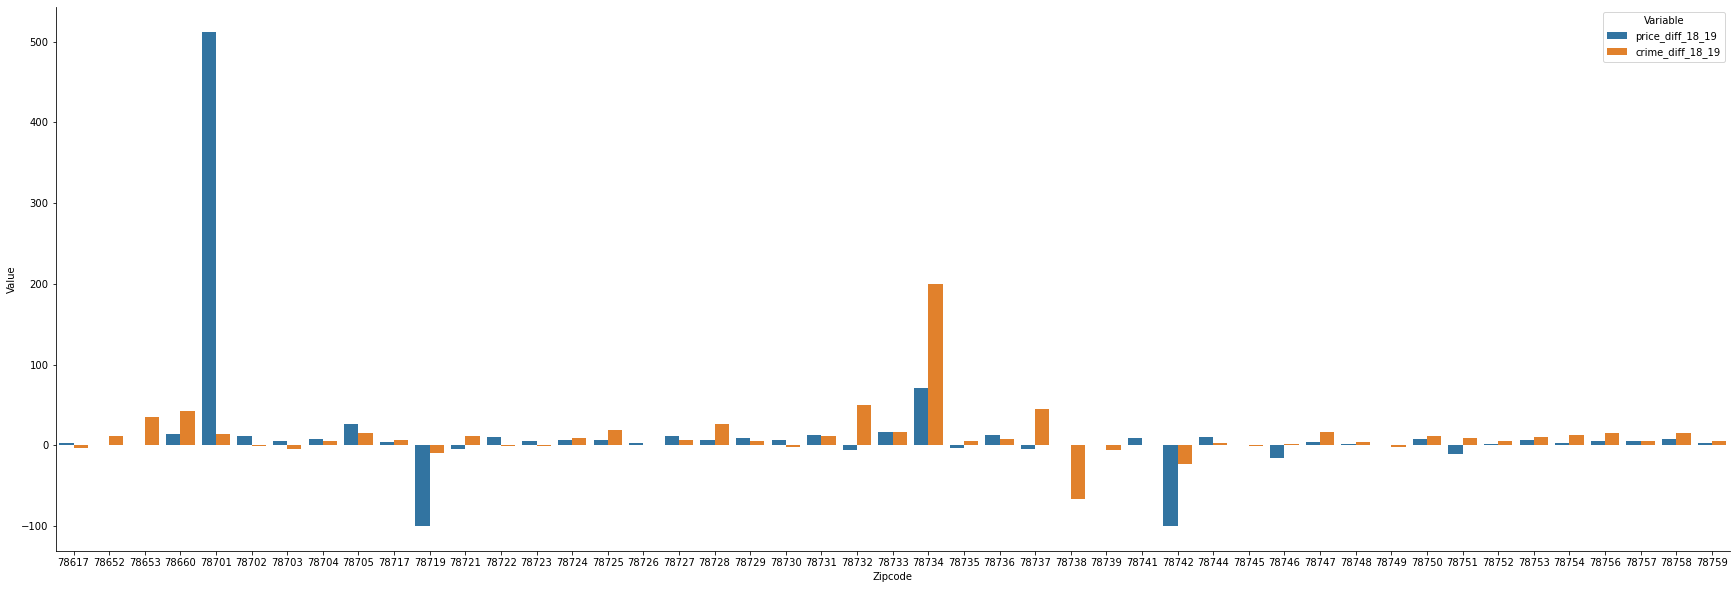

In [29]:
# plot with seaborn barplot
fig, ax1 = plt.subplots(figsize=(30, 10))
tidy = price_crime_18_19.melt(id_vars='zipcode').rename(columns=str.title)
sns.barplot(x='Zipcode', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
# fig.savefig('18_19.png')

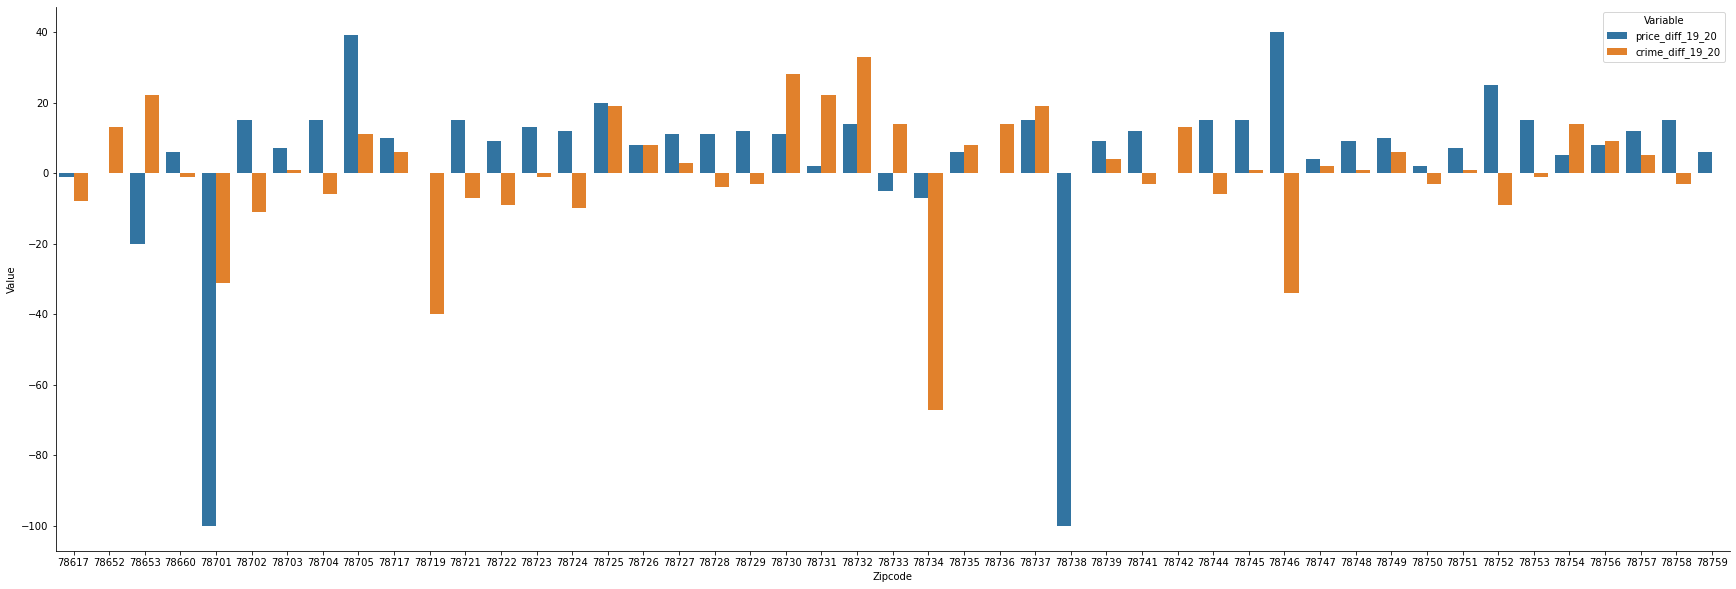

In [30]:
fig, ax1 = plt.subplots(figsize=(30, 10))
tidy = price_crime_19_20.melt(id_vars='zipcode').rename(columns=str.title)
sns.barplot(x='Zipcode', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
# fig.savefig('19_20.png')

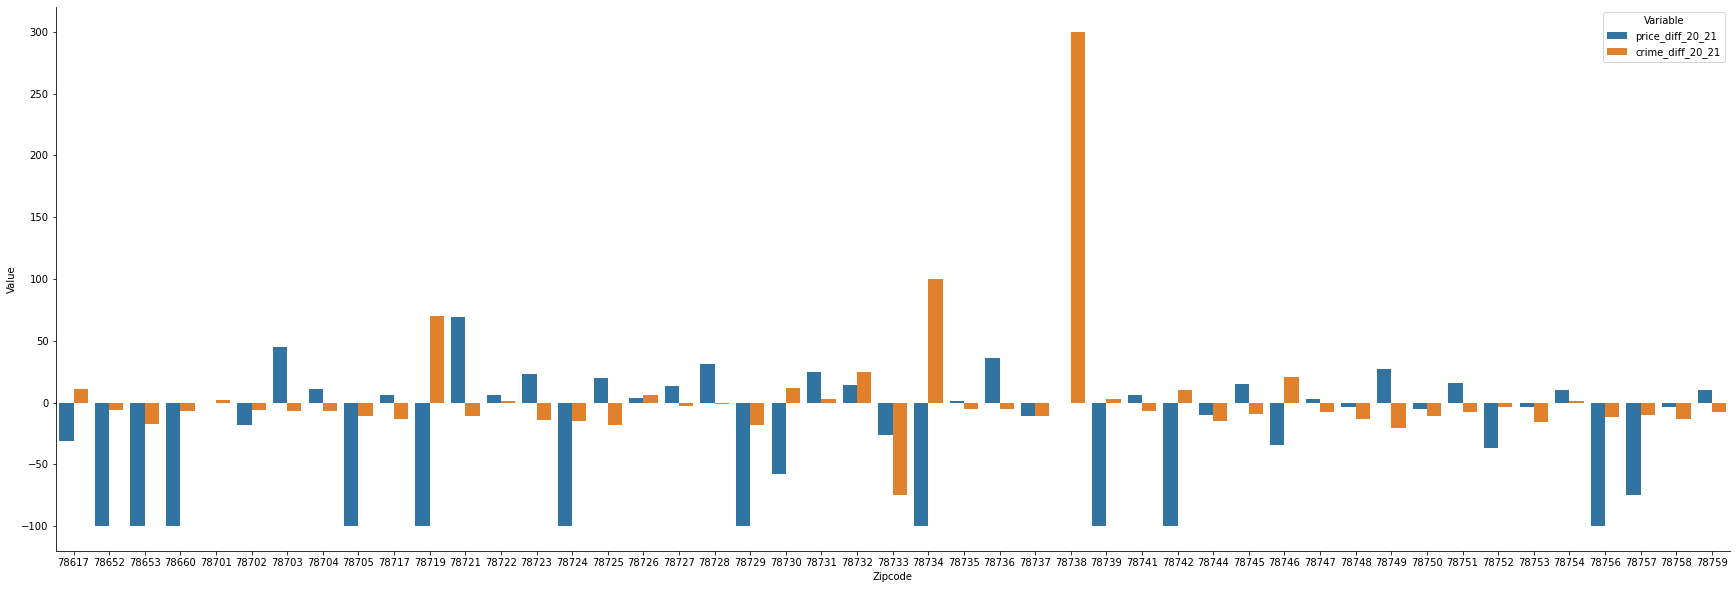

In [31]:
fig, ax1 = plt.subplots(figsize=(30, 10))
tidy = price_crime_20_21.melt(id_vars='zipcode').rename(columns=str.title)
sns.barplot(x='Zipcode', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
# fig.savefig('20_21.png')

# One sample t-test 

In [ ]:
#two sample t-test for crime/housing increase/decrease 2018-2019
group1 = price_crime['crime_diff_18_19'].to_list()
group2 = price_crime['price_diff_18_19'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=group1, b=group2, equal_var=True)

In [ ]:
#two sample t-test for crime/housing increase/decrease 2019-2020
group3 = price_crime['crime_diff_19_20'].to_list()
group4 = price_crime['price_diff_19_20'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=group3, b=group4, equal_var=True)

In [ ]:
#two sample t-test for crime/housing increase/decrease 2020-2021
group5 = price_crime['crime_diff_20_21'].to_list()
group6 = price_crime['price_diff_20_21'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=group5, b=group6, equal_var=True)

# Multiple Linear Regression - more variables 


In [46]:
df_mlm = pd.read_csv('Resources/HousingData_MLM.csv', index_col = [0])

In [47]:
df_mlm.dtypes

zipcode                     int64
propertyTaxRate           float64
latestPrice               float64
latest_saleyear             int64
lotSizeSqFt               float64
livingAreaSqFt            float64
numOfPrimarySchools         int64
numOfElementarySchools      int64
numOfMiddleSchools          int64
numOfHighSchools            int64
numOfBathrooms            float64
numOfBedrooms               int64
numOfStories                int64
dtype: object

In [48]:
mlm_merge = pd.merge(df_mlm, group_df2[['Incident_Number','hour']], on ='zipcode',how = 'left')
mlm_merge = mlm_merge.rename(columns={"Incident_Number": "Count_Crimes"})
mlm_merge

,zipcode,propertyTaxRate,latestPrice,latest_saleyear,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,numOfBathrooms,numOfBedrooms,numOfStories,Count_Crimes,hour
0,78660,1.98,305000.0,2019,6011.0,2601.0,1,0,1,1,3.0,4,2,3040.0,3040.0
1,78660,1.98,295000.0,2020,6185.0,1768.0,1,0,1,1,2.0,4,1,3040.0,3040.0
2,78660,1.98,256125.0,2019,7840.0,1478.0,0,2,1,1,2.0,3,1,3040.0,3040.0
3,78660,1.98,240000.0,2018,6098.0,1678.0,1,0,1,1,2.0,3,1,3040.0,3040.0
4,78660,1.98,239900.0,2018,6708.0,2132.0,1,0,1,1,3.0,3,2,3040.0,3040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,1.98,330000.0,2020,6534.0,1234.0,1,0,1,1,2.0,3,1,13701.0,13701.0
15167,78741,1.98,550000.0,2020,2439.0,1888.0,1,0,1,1,4.0,3,3,31907.0,31907.0
15168,78704,1.98,875000.0,2021,9408.0,1524.0,1,0,1,1,3.0,3,2,26036.0,26036.0
15169,78722,1.98,420000.0,2019,6098.0,6068.0,1,0,1,1,2.0,4,1,3019.0,3019.0


In [49]:
mlm_merge.isnull().sum(axis = 0)

zipcode                    0
propertyTaxRate            0
latestPrice                0
latest_saleyear            0
lotSizeSqFt                0
livingAreaSqFt             0
numOfPrimarySchools        0
numOfElementarySchools     0
numOfMiddleSchools         0
numOfHighSchools           0
numOfBathrooms             0
numOfBedrooms              0
numOfStories               0
Count_Crimes              12
hour                      12
dtype: int64

In [50]:
mlm_merge[["Count_Crimes","hour"]] = new_merge[["Count_Crimes","hour"]].fillna(0)

In [51]:
mlm_merge.isnull().sum(axis = 0)

zipcode                   0
propertyTaxRate           0
latestPrice               0
latest_saleyear           0
lotSizeSqFt               0
livingAreaSqFt            0
numOfPrimarySchools       0
numOfElementarySchools    0
numOfMiddleSchools        0
numOfHighSchools          0
numOfBathrooms            0
numOfBedrooms             0
numOfStories              0
Count_Crimes              0
hour                      0
dtype: int64

In [52]:
#scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(mlm_merge)

In [53]:
y = mlm_merge[["latestPrice"]]
X = mlm_merge.drop("latestPrice", axis=1)

In [54]:
mlr_model = linear_model.LinearRegression()

In [55]:
mlr_model.fit(X,y)

LinearRegression()

In [56]:
y_pred = mlr_model.predict(X)
y_pred.shape

(15171, 1)

In [57]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     659.0
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:19:36   Log-Likelihood:            -2.1572e+05
No. Observations:               15171   AIC:                         4.315e+05
Df Residuals:                   15157   BIC:                         4.316e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.98

# More housing variables in Linear Regression 

In [3]:
df = pd.read_csv('Resources/HousingData_cont.csv', index_col = [0])

In [13]:
merge = pd.merge(df, group_df2[['Incident_Number','hour']], on ='zipcode',how = 'left')
merge = merge.rename(columns={"Incident_Number": "Count_Crimes"})
merge

,zipcode,propertyTaxRate,garageSpaces,parkingSpaces,latestPrice,numPriceChanges,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,...,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfBedrooms.1,numOfStories,Count_Crimes,hour
0,78660,1.98,2,2,305000.0,5,0,5,2,1,...,1.266667,2.666667,1063,14,3.0,4,4,2,3040.0,3040.0
1,78660,1.98,2,2,295000.0,1,0,1,2,0,...,1.400000,2.666667,1063,14,2.0,4,4,1,3040.0,3040.0
2,78660,1.98,0,0,256125.0,1,0,4,1,0,...,1.200000,3.000000,1108,14,2.0,3,3,1,3040.0,3040.0
3,78660,1.98,2,2,240000.0,4,0,0,2,0,...,1.400000,2.666667,1063,14,2.0,3,3,1,3040.0,3040.0
4,78660,1.98,0,0,239900.0,3,0,0,1,0,...,1.133333,4.000000,1223,14,3.0,3,3,2,3040.0,3040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,1.98,6,6,330000.0,1,0,3,2,4,...,0.900000,3.333333,1424,14,2.0,3,3,1,13701.0,13701.0
15167,78741,1.98,2,2,550000.0,1,1,5,2,2,...,1.900000,6.666667,1226,16,4.0,3,3,3,31907.0,31907.0
15168,78704,1.98,2,2,875000.0,7,0,3,3,0,...,0.800000,5.000000,889,13,3.0,3,3,2,26036.0,26036.0
15169,78722,1.98,0,0,420000.0,5,0,3,1,0,...,1.300000,6.666667,1057,15,2.0,4,4,1,3019.0,3019.0


In [15]:
merge.isnull().sum(axis = 0)

zipcode                        0
propertyTaxRate                0
garageSpaces                   0
parkingSpaces                  0
latestPrice                    0
numPriceChanges                0
numOfAccessibilityFeatures     0
numOfAppliances                0
numOfParkingFeatures           0
numOfPatioAndPorchFeatures     0
numOfSecurityFeatures          0
numOfSecurityFeatures.1        0
numOfWaterfrontFeatures        0
numOfWindowFeatures            0
numOfCommunityFeatures         0
lotSizeSqFt                    0
livingAreaSqFt                 0
numOfPrimarySchools            0
numOfElementarySchools         0
numOfMiddleSchools             0
numOfHighSchools               0
avgSchoolDistance              0
avgSchoolRating                0
avgSchoolSize                  0
MedianStudentsPerTeacher       0
numOfBathrooms                 0
numOfBedrooms                  0
numOfBedrooms.1                0
numOfStories                   0
Count_Crimes                  12
hour      

In [16]:
#fill nulls with zero 
merge[["Count_Crimes","hour"]] = merge[["Count_Crimes","hour"]].fillna(0)

In [17]:
#scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(merge)

In [19]:
y = merge[["latestPrice"]]
X = merge.drop(["latestPrice","zipcode"], axis=1)

In [20]:
model = linear_model.LinearRegression()

In [21]:
model.fit(X,y)

LinearRegression()

In [22]:
y_pred = model.predict(X)
y_pred.shape

(15171, 1)

In [24]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     364.6
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:35:50   Log-Likelihood:            -2.1543e+05
No. Observations:               15171   AIC:                         4.309e+05
Df Residuals:                   15144   BIC:                         4.311e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               